# Airline Passenger Satisfaction

## Download Dataset

## Import Packages

In [1]:
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt

#show plots in notebooks
%matplotlib inline

# seaborn for plotting as well
import seaborn as sns

## Read Dataset

In [14]:
train_file = './dataset/orig/train.csv'
test_file  = './dataset/orig/test.csv'
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

## About Data

In [15]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
len(train_df.columns)

25

In [17]:
test_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [18]:
len(test_df.columns)

25

In [19]:
# drop Unnamed column
train_df = train_df.drop('Unnamed: 0', axis=1)
# drop id column as well
train_df = train_df.drop('id', axis=1)

In [20]:
# do the same for test as well
test_df = test_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('id', axis =1)

In [21]:
print(train_df.shape)
print(test_df.shape)

(103904, 23)
(25976, 23)


### Datatypes


In [22]:
train_df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [23]:
print(train_df.dtypes[train_df.dtypes == 'int'])
print(len(train_df.dtypes[train_df.dtypes == 'int']))

Age                                  int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
dtype: object
17


In [24]:
print(train_df.dtypes[train_df.dtypes == 'float64'])

Arrival Delay in Minutes    float64
dtype: object


### Catogerical Variables

In [25]:
# catogerical values
train_df.dtypes[train_df.dtypes =='object']

Gender            object
Customer Type     object
Type of Travel    object
Class             object
satisfaction      object
dtype: object

In [26]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
train_df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [28]:
train_df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [29]:
train_df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [30]:
train_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [31]:
train_df.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### Plot of Catogerical variables

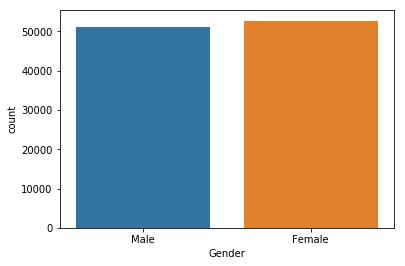

In [32]:
sns.countplot(x='Gender', data=train_df)

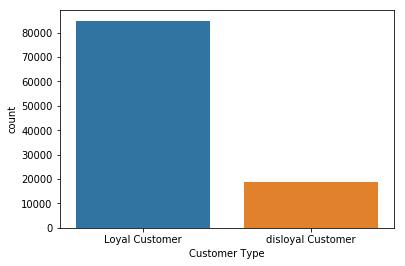

In [33]:
sns.countplot(x='Customer Type', data=train_df)

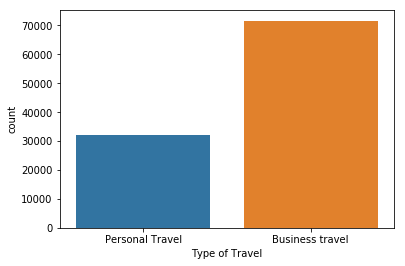

In [34]:
sns.countplot(x='Type of Travel', data=train_df)

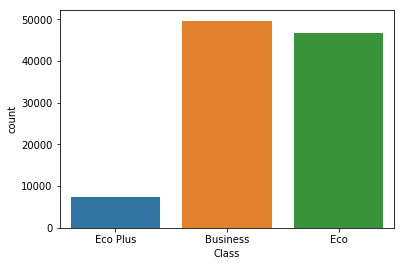

In [35]:
sns.countplot(x='Class', data=train_df)

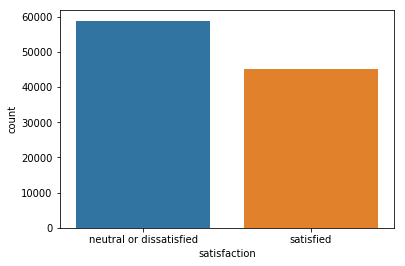

In [36]:
sns.countplot(x='satisfaction', data=train_df)

In [37]:
test_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Handle of Categorical Variables

In [42]:
train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [57]:
cat_cols = train_df.dtypes[train_df.dtypes =='object'].index.tolist()
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [58]:
## use scikit lable encoder
from sklearn.preprocessing import LabelEncoder

In [59]:
for cat in cat_cols:
  print('processing ...', cat)
  le = LabelEncoder()
  le.fit(train_df[cat])
  print(le.classes_)
  train_df[cat] = le.transform(train_df[cat])
  test_df[cat] = le.transform(test_df[cat])
  print()


processing ... Gender
['Female' 'Male']

processing ... Customer Type
['Loyal Customer' 'disloyal Customer']

processing ... Type of Travel
['Business travel' 'Personal Travel']

processing ... Class
['Business' 'Eco' 'Eco Plus']

processing ... satisfaction
['neutral or dissatisfied' 'satisfied']



In [60]:
print(len(train_df.columns))
print(len(test_df.columns))

23
23


In [61]:
print(train_df.Gender.unique())
print(train_df['Customer Type'].unique())
print(train_df['Type of Travel'].unique())
print(train_df['Class'].unique())
print(train_df['satisfaction'].unique())

[1 0]
[0 1]
[1 0]
[2 0 1]
[0 1]


## Data Cleaning

In [62]:
train_df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [63]:
## identify the null / missing values 
train_df.select_dtypes(include=['int64', 'float64']).isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [64]:
test_df.select_dtypes(include=['int64', 'float64']).isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

### Fill missing values

In [65]:
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].median(), inplace=True)

In [66]:
train_df.select_dtypes(include=['int64', 'float64']).isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [67]:
test_df.select_dtypes(include=['int64', 'float64']).isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Correlation Info

In [68]:
correlations = train_df.corr()

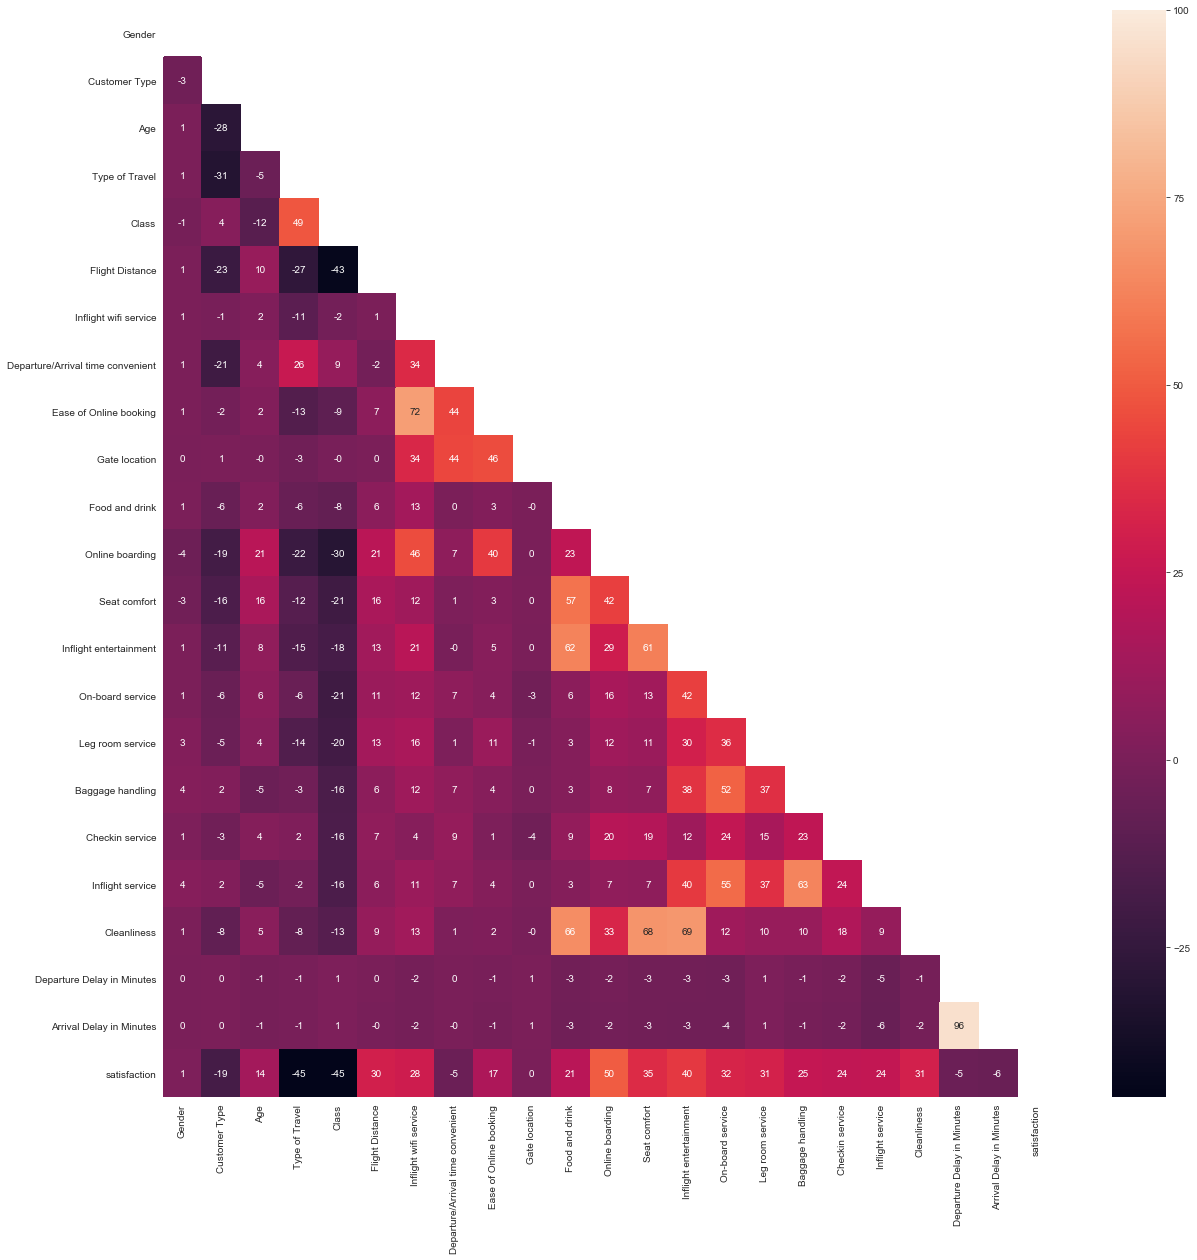

In [69]:
# mask the upper triangular matrix
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('white')
plt.figure(figsize=(20,20))

#sns.heatmap(correlations)

sns.heatmap(correlations * 100, annot=True, fmt = '.0f', mask = mask)

## Store Datasets

## Create AWS compatible dataset

In [72]:
cols = train_df.columns.tolist()
colIdx = train_df.columns.get_loc('satisfaction')
cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:] 
print(cols)

['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [73]:
modified_data = train_df[cols]

In [74]:
tt_cols = test_df.columns.tolist()
colIdx = test_df.columns.get_loc('satisfaction')
tt_cols = tt_cols[colIdx:colIdx+1] + tt_cols[0:colIdx] + tt_cols[colIdx+1:] 
print(tt_cols)

['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [75]:
mod_test_data = test_df[tt_cols]

In [76]:
modified_data.to_csv('./dataset/Processed/train_aws.csv', header=False, index=False)
#tt_df.to_csv('/content/test_aws.csv', header=False, index=False)

In [77]:
mod_test_data.to_csv('./dataset/Processed/test_aws.csv', header=False, index=False)